#**The Renewable Energy Analysis, Prediction, and the potential capacity to achieve a sustainable Economic Development.**



##**The Prediction of Renewable Energy Production**

Team #17 | Batool Khanfar, Diyaa Alhariri , Omar, Maryam Odat

In [ ]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/DataFrame For renewable /dataframe.xlsx')

In [ ]:
df.head()

,Unnamed: 0,Entity,Code,Year,Electricity from wind (TWh),Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Other renewables_including_bioenergy_TWh,Renewables_percentage_electricity,AREA_KM2,Population,GDP,Primary_energy_consumption_TWh,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh,Continent
0,0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0,65.957440,647500.0,19542982,NaN,5.913606,0.0,310.0,0.0,0.0,Asia
1,1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0,84.745766,647500.0,19688632,NaN,4.664077,0.0,500.0,0.0,0.0,Asia
2,2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0,81.159424,647500.0,21000256,3.854235e+09,4.428160,0.0,560.0,0.0,0.0,Asia
3,3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0,67.021280,647500.0,22645130,4.539497e+09,5.207662,0.0,630.0,0.0,0.0,Asia
4,4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0,62.921350,647500.0,23553551,5.220825e+09,4.810372,0.0,560.0,0.0,0.0,Asia


In [ ]:
df.isnull().sum()

Unnamed: 0                                    0
Entity                                        0
Code                                          0
Year                                          0
Electricity from wind (TWh)                   0
Electricity_from_hydro_TWh                    1
Electricity_from_solar_TWh                    0
Other renewables_including_bioenergy_TWh      0
Renewables_percentage_electricity             0
AREA_KM2                                    226
Population                                    0
GDP                                         160
Primary_energy_consumption_TWh                0
Electricity_from_wind_GWh                     0
Electricity_from_hydro_GWh                    1
Electricity_from_solar_GWh                    0
Other_renewables_including_bioenergy_GWh      0
Continent                                     0
dtype: int64

In [ ]:
df.isnull().sum().sum()

388

In [ ]:
rows ,columns = df.shape
print(f'The number of rows is {rows } and columns {columns}')


The number of rows is 5253 and columns 18


In [ ]:
df.describe()

,Unnamed: 0,Year,Electricity from wind (TWh),Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Other renewables_including_bioenergy_TWh,Renewables_percentage_electricity,AREA_KM2,Population,GDP,Primary_energy_consumption_TWh,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh
count,5253.000000,5253.000000,5253.000000,5252.000000,5253.000000,5253.000000,5253.000000,5.027000e+03,5.253000e+03,5.093000e+03,5253.000000,5253.000000,5.252000e+03,5253.000000,5253.000000
mean,2626.000000,2006.181991,2.461154,20.058875,0.898090,2.133536,30.316232,8.396666e+05,4.168255e+07,3.464999e+11,831.795357,2461.153629,2.005887e+04,898.089509,2133.535715
std,1516.554813,9.200711,20.005822,73.683098,8.993691,8.446564,32.361865,2.182110e+06,1.455070e+08,1.386659e+12,3038.301508,20005.821780,7.368310e+04,8993.691495,8446.563575
min,0.000000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000e+01,1.023300e+04,4.756284e+07,0.124093,0.000000,0.000000e+00,0.000000,0.000000
25%,1313.000000,2000.000000,0.000000,0.020000,0.000000,0.000000,1.515151,2.874800e+04,2.140215e+06,6.979155e+09,18.396421,0.000000,2.000000e+01,0.000000,0.000000
50%,2626.000000,2007.000000,0.000000,1.503000,0.000000,0.010000,16.666668,1.632700e+05,8.746084e+06,3.300020e+10,102.291020,0.000000,1.503000e+03,0.000000,10.000000
75%,3939.000000,2014.000000,0.040000,9.702500,0.010000,0.500000,54.761906,6.003700e+05,2.869868e+07,1.773532e+11,479.593540,40.000000,9.702500e+03,10.000000,500.000000
max,5252.000000,2021.000000,655.600000,1321.710000,327.000000,169.931580,100.000015,1.710000e+07,1.412360e+09,2.331508e+13,43790.895000,655600.000000,1.321710e+06,327000.000000,169931.580000


In [ ]:
df.columns

Index(['Unnamed: 0', 'Entity', 'Code', 'Year', 'Electricity from wind (TWh)',
       'Electricity_from_hydro_TWh', 'Electricity_from_solar_TWh',
       'Other renewables_including_bioenergy_TWh',
       'Renewables_percentage_electricity', 'AREA_KM2', 'Population', 'GDP',
       'Primary_energy_consumption_TWh', 'Electricity_from_wind_GWh',
       'Electricity_from_hydro_GWh', 'Electricity_from_solar_GWh',
       'Other_renewables_including_bioenergy_GWh', 'Continent'],
      dtype='object')

In [ ]:

df['GDP']=df['GDP'].fillna(df['GDP'].mean())

In [ ]:
df['AREA_KM2']=df['AREA_KM2'].fillna(df['AREA_KM2'].mean())

In [ ]:

df['Electricity_from_hydro_GWh'] = df['Electricity_from_hydro_GWh'].fillna(0)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Entity', 'Code', 'Year', 'Electricity from wind (TWh)',
       'Electricity_from_hydro_TWh', 'Electricity_from_solar_TWh',
       'Other renewables_including_bioenergy_TWh',
       'Renewables_percentage_electricity', 'AREA_KM2', 'Population', 'GDP',
       'Primary_energy_consumption_TWh', 'Electricity_from_wind_GWh',
       'Electricity_from_hydro_GWh', 'Electricity_from_solar_GWh',
       'Other_renewables_including_bioenergy_GWh', 'Continent'],
      dtype='object')

In [ ]:
# convert Primary_energy_consumption_TWh to giga whatt hour
df['Electricity_from_wind_GWH'] =df['Primary_energy_consumption_TWh'].apply(lambda x: x * 1000)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Entity', 'Code', 'Year', 'Electricity from wind (TWh)',
       'Electricity_from_hydro_TWh', 'Electricity_from_solar_TWh',
       'Other renewables_including_bioenergy_TWh',
       'Renewables_percentage_electricity', 'AREA_KM2', 'Population', 'GDP',
       'Primary_energy_consumption_TWh', 'Electricity_from_wind_GWh',
       'Electricity_from_hydro_GWh', 'Electricity_from_solar_GWh',
       'Other_renewables_including_bioenergy_GWh', 'Continent',
       'Electricity_from_wind_GWH'],
      dtype='object')

In [ ]:
X =df[['Renewables_percentage_electricity', 'AREA_KM2', 'Population', 'GDP',
       'Electricity_from_wind_GWH', 'Electricity_from_wind_GWh',
       'Electricity_from_hydro_GWh', 'Electricity_from_solar_GWh',
       'Other_renewables_including_bioenergy_GWh']]


In [ ]:

Y = df['Renewables_percentage_electricity']


In [ ]:
X.shape


(5253, 9)

In [ ]:
Y.shape

(5253,)

In [ ]:
X_Continent=df['Continent']

In [ ]:
X_Continent

0         Asia
1         Asia
2         Asia
3         Asia
4         Asia
         ...  
5248    Africa
5249    Africa
5250    Africa
5251    Africa
5252    Africa
Name: Continent, Length: 5253, dtype: object

In [ ]:
# using .get_dummies function to convert the categorical datatype to numerical

X_Continent = pd.get_dummies(df['Continent'])


In [ ]:
X_Continent

,Africa,Asia,Europe,North America,Oceania,South America
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
5248,1,0,0,0,0,0
5249,1,0,0,0,0,0
5250,1,0,0,0,0,0
5251,1,0,0,0,0,0


In [ ]:
X = pd.concat([X, X_Continent], axis=1)

In [ ]:
X

,Renewables_percentage_electricity,AREA_KM2,Population,GDP,Electricity_from_wind_GWH,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh,Africa,Asia,Europe,North America,Oceania,South America
0,65.957440,647500.0,19542982,3.464999e+11,5913.6060,0.0,310.0,0.0,0.0,0,1,0,0,0,0
1,84.745766,647500.0,19688632,3.464999e+11,4664.0770,0.0,500.0,0.0,0.0,0,1,0,0,0,0
2,81.159424,647500.0,21000256,3.854235e+09,4428.1597,0.0,560.0,0.0,0.0,0,1,0,0,0,0
3,67.021280,647500.0,22645130,4.539497e+09,5207.6616,0.0,630.0,0.0,0.0,0,1,0,0,0,0
4,62.921350,647500.0,23553551,5.220825e+09,4810.3720,0.0,560.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,57.188496,390580.0,14154937,1.996312e+10,54651.0800,0.0,4940.0,10.0,420.0,1,0,0,0,0,0
5249,48.680350,390580.0,14452704,2.054868e+10,46665.9360,0.0,2950.0,10.0,360.0,1,0,0,0,0,0
5250,58.503407,390580.0,14751101,1.758489e+10,45936.0500,0.0,3970.0,10.0,320.0,1,0,0,0,0,0
5251,59.412407,390580.0,15052184,3.415607e+10,47502.0680,0.0,5050.0,20.0,390.0,1,0,0,0,0,0


In [ ]:

# Splitting the dependent and independent features of the dataset into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 10 )

In [ ]:
X_test.shape

(1576, 15)

In [ ]:
# Creating an instance for the linear regression model of sklearn
model =LinearRegression( )

In [ ]:

# Training the model by passing the dependent and independent features of the training dataset
model.fit( X_train, Y_train)

LinearRegression()

In [ ]:
# Creating an array of predictions made by the model for the unseen or test dataset
Y_pred = model.predict( X_test )

In [ ]:
# The value of the coefficients for the independent feature through the multiple regression model
print("Value of the oefficients: \n", model.coef_)

Value of the oefficients: 
 [ 1.00000000e+00 -3.66051774e-19 -1.48161876e-20 -2.50091918e-25
  7.45310767e-19  9.96507350e-18  3.50231835e-18 -3.92134590e-17
 -7.42590970e-17 -1.10436860e-15 -9.26767655e-16 -8.58682591e-16
 -9.33199598e-16 -1.10871263e-15  4.93943532e-15]


In [ ]:
model_coff = pd.DataFrame(model.coef_,X_train.columns ,columns=['Coffiecent'])
model_coff

,Coffiecent
Renewables_percentage_electricity,1.000000e+00
AREA_KM2,-3.660518e-19
Population,-1.481619e-20
GDP,-2.500919e-25
Electricity_from_wind_GWH,7.453108e-19
Electricity_from_wind_GWh,9.965074e-18
Electricity_from_hydro_GWh,3.502318e-18
Electricity_from_solar_GWh,-3.921346e-17
Other_renewables_including_bioenergy_GWh,-7.425910e-17
Africa,-1.104369e-15


In [ ]:
# The value of the mean squared error
me = mean_squared_error( Y_test, Y_pred)
print(f"Mean square error: {me}")

Mean square error: 2.633663244586887e-24


In [ ]:
mean_absolute_error(Y_test, Y_pred)

6.920576502272437e-13

In [ ]:
# The value of the coefficient of determination, i.e., R-square score of the model
print(f"Coefficient of determination: {r2_score( Y_test, Y_pred )}")

Coefficient of determination: 1.0


Without alpha :
Coefficient of determination: 1.0

In [ ]:
Y_test

4862      0.000000
4892      9.116711
1680     22.231913
3498      0.000000
1978      6.097561
           ...    
4479     55.128210
2473      0.508351
2686    100.000000
4974      4.602989
2115     99.777290
Name: Renewables_percentage_electricity, Length: 1576, dtype: float64

In [ ]:
Y_pred

array([4.64133693e-13, 9.11671100e+00, 2.22319130e+01, ...,
       1.00000000e+02, 4.60298900e+00, 9.97772900e+01])

<Axes: xlabel='Renewables_percentage_electricity'>

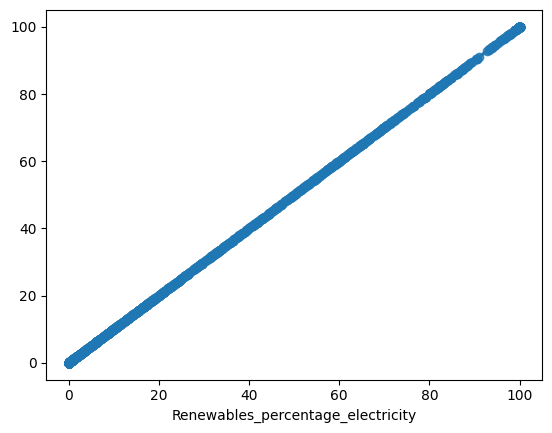

In [ ]:
sns.regplot(x=Y_test, y=Y_pred)

## Make Normalization







In [ ]:
X.columns

Index(['Renewables_percentage_electricity', 'AREA_KM2', 'Population', 'GDP',
       'Electricity_from_wind_GWH', 'Electricity_from_wind_GWh',
       'Electricity_from_hydro_GWh', 'Electricity_from_solar_GWh',
       'Other_renewables_including_bioenergy_GWh', 'Africa', 'Asia', 'Europe',
       'North America', 'Oceania', 'South America'],
      dtype='object')

In [ ]:
X_normal= X[[
    'Renewables_percentage_electricity', 'AREA_KM2', 'Population', 'GDP',
       'Electricity_from_wind_GWH', 'Electricity_from_wind_GWh',
       'Electricity_from_hydro_GWh', 'Electricity_from_solar_GWh',
       'Other_renewables_including_bioenergy_GWh'
       ]]

In [ ]:
X_normal.head()

,Renewables_percentage_electricity,AREA_KM2,Population,GDP,Electricity_from_wind_GWH,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh
0,65.957440,647500.0,19542982,3.464999e+11,5913.6060,0.0,310.0,0.0,0.0
1,84.745766,647500.0,19688632,3.464999e+11,4664.0770,0.0,500.0,0.0,0.0
2,81.159424,647500.0,21000256,3.854235e+09,4428.1597,0.0,560.0,0.0,0.0
3,67.021280,647500.0,22645130,4.539497e+09,5207.6616,0.0,630.0,0.0,0.0
4,62.921350,647500.0,23553551,5.220825e+09,4810.3720,0.0,560.0,0.0,0.0


In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
d = scaler.fit_transform(X_normal)
X_normal = pd.DataFrame(d, columns=X_normal.columns)

In [ ]:
X_normal

,Renewables_percentage_electricity,AREA_KM2,Population,GDP,Electricity_from_wind_GWH,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh
0,0.659574,0.037864,0.013830,0.014860,0.000132,0.0,0.000235,0.000000,0.000000
1,0.847458,0.037864,0.013933,0.014860,0.000104,0.0,0.000378,0.000000,0.000000
2,0.811594,0.037864,0.014862,0.000163,0.000098,0.0,0.000424,0.000000,0.000000
3,0.670213,0.037864,0.016026,0.000193,0.000116,0.0,0.000477,0.000000,0.000000
4,0.629213,0.037864,0.016670,0.000222,0.000107,0.0,0.000424,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
5248,0.571885,0.022840,0.010015,0.000854,0.001245,0.0,0.003738,0.000031,0.002472
5249,0.486803,0.022840,0.010226,0.000879,0.001063,0.0,0.002232,0.000031,0.002118
5250,0.585034,0.022840,0.010437,0.000752,0.001046,0.0,0.003004,0.000031,0.001883
5251,0.594124,0.022840,0.010650,0.001463,0.001082,0.0,0.003821,0.000061,0.002295


In [ ]:
X_normal = pd.concat([X_normal, X_Continent], axis=1)

In [ ]:
X_normal.head()

,Renewables_percentage_electricity,AREA_KM2,Population,GDP,Electricity_from_wind_GWH,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh,Africa,Asia,Europe,North America,Oceania,South America
0,0.659574,0.037864,0.013830,0.014860,0.000132,0.0,0.000235,0.0,0.0,0,1,0,0,0,0
1,0.847458,0.037864,0.013933,0.014860,0.000104,0.0,0.000378,0.0,0.0,0,1,0,0,0,0
2,0.811594,0.037864,0.014862,0.000163,0.000098,0.0,0.000424,0.0,0.0,0,1,0,0,0,0
3,0.670213,0.037864,0.016026,0.000193,0.000116,0.0,0.000477,0.0,0.0,0,1,0,0,0,0
4,0.629213,0.037864,0.016670,0.000222,0.000107,0.0,0.000424,0.0,0.0,0,1,0,0,0,0


In [ ]:
Y_normal = X_normal['Renewables_percentage_electricity']


In [ ]:
Y_normal.shape

(5253,)

In [ ]:
X_normal = X_normal.drop(['Renewables_percentage_electricity'] ,axis=1)

In [ ]:

X_normal.head()

,AREA_KM2,Population,GDP,Electricity_from_wind_GWH,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh,Africa,Asia,Europe,North America,Oceania,South America
0,0.037864,0.013830,0.014860,0.000132,0.0,0.000235,0.0,0.0,0,1,0,0,0,0
1,0.037864,0.013933,0.014860,0.000104,0.0,0.000378,0.0,0.0,0,1,0,0,0,0
2,0.037864,0.014862,0.000163,0.000098,0.0,0.000424,0.0,0.0,0,1,0,0,0,0
3,0.037864,0.016026,0.000193,0.000116,0.0,0.000477,0.0,0.0,0,1,0,0,0,0
4,0.037864,0.016670,0.000222,0.000107,0.0,0.000424,0.0,0.0,0,1,0,0,0,0


In [ ]:
# Splitting the dependent and independent features of the dataset into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split( X_normal, Y_normal, test_size = 0.3, random_state = np.random.seed(42) )

In [ ]:
# Creating an instance for the linear regression model of sklearn
model_normal =LinearRegression( )

In [ ]:
# Training the model by passing the dependent and independent features of the training dataset
model_normal.fit( X_train, Y_train)

LinearRegression()

In [ ]:
# Creating an array of predictions made by the model for the unseen or test dataset
Y_pred = model_normal.predict( X_test )

In [ ]:
# The value of the coefficients for the independent feature through the multiple regression model
print("Value of the oefficients: \n", model_normal.coef_)

Value of the oefficients: 
 [-0.12106421  0.10751536  0.59691661 -2.76861272 -0.21858652  2.88911646
 -1.23720124  1.07972531  0.0792203  -0.10514556 -0.02557285 -0.09412727
 -0.07866215  0.22428752]


In [ ]:

# The value of the mean squared error
me = mean_squared_error( Y_test, Y_pred)
print("The Mean sequred Error of our Model is {}".format(round(me, 2)))

The Mean sequred Error of our Model is 0.09


In [ ]:
score =mean_absolute_error(Y_test, Y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.24


In [ ]:
# The value of the coefficient of determination, i.e., R-square score of the model
score = r2_score( Y_test, Y_pred )
print("Coefficient of determination {} : ".format(round(score,2)))

Coefficient of determination 0.17 : 


<Axes: xlabel='Renewables_percentage_electricity'>

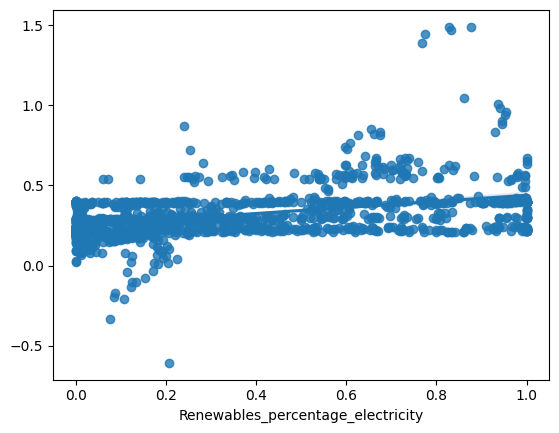

In [ ]:
sns.regplot(x=Y_test, y=Y_pred)

In [ ]:
model_normal_coff = pd.DataFrame(model_normal.coef_,X_train.columns ,columns=['Coffiecent'])
model_normal_coff

,Coffiecent
AREA_KM2,-0.121064
Population,0.107515
GDP,0.596917
Electricity_from_wind_GWH,-2.768613
Electricity_from_wind_GWh,-0.218587
Electricity_from_hydro_GWh,2.889116
Electricity_from_solar_GWh,-1.237201
Other_renewables_including_bioenergy_GWh,1.079725
Africa,0.079220
Asia,-0.105146


## Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [ ]:
ridge = Ridge(alpha=0.0001)
ridge.fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)

In [ ]:
# The value of the coefficients for the independent feature through the multiple regression model
print("Value of the oefficients: \n",ridge.coef_)

Value of the oefficients: 
 [-0.12105671  0.10748412  0.59672945 -2.76832549 -0.21861145  2.88892705
 -1.23695455  1.07965957  0.07921891 -0.1051472  -0.02557329 -0.09412711
 -0.07866364  0.22429232]


In [ ]:
# The value of the mean squared error
me = mean_squared_error( Y_test, Y_pred)
print("The Mean sequred Error of our Model is {}".format(round(me, 2)))

The Mean sequred Error of our Model is 0.09


In [ ]:
score =mean_absolute_error(Y_test, Y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.24


In [ ]:
# The value of the coefficient of determination, i.e., R-square score of the model
score = r2_score( Y_test, Y_pred )
print("Coefficient of determination {} : ".format(round(score,2)))

Coefficient of determination 0.17 : 


In [ ]:
model_coff = pd.DataFrame(ridge.coef_,X_train.columns ,columns=['Coffiecent'])
model_coff

,Coffiecent
AREA_KM2,-0.121057
Population,0.107484
GDP,0.596729
Electricity_from_wind_GWH,-2.768325
Electricity_from_wind_GWh,-0.218611
Electricity_from_hydro_GWh,2.888927
Electricity_from_solar_GWh,-1.236955
Other_renewables_including_bioenergy_GWh,1.079660
Africa,0.079219
Asia,-0.105147


<Axes: xlabel='Renewables_percentage_electricity'>

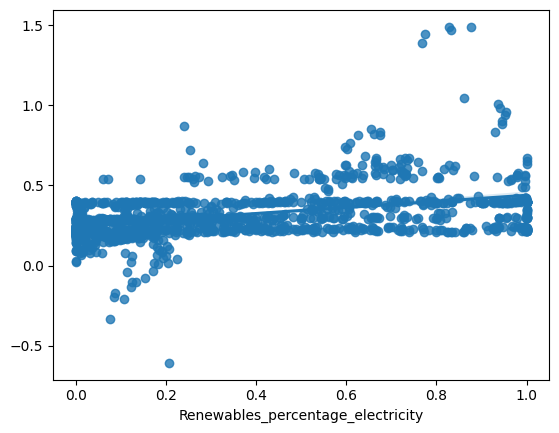

In [ ]:
sns.regplot(x=Y_test, y=Y_pred)

# Lasso Regression

In [ ]:
lasso = Lasso( )
lasso.fit(X_train, Y_train)
Y_predict = lasso.predict(X_test)

In [ ]:
# The value of the coefficients for the independent feature through the multiple regression model
print("Value of the oefficients: \n",lasso.coef_)

Value of the oefficients: 
 [ 0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0.]


In [ ]:
# The value of the mean squared error
me = mean_squared_error( Y_test, Y_pred)
print("The Mean sequred Error of our Model is {}".format(round(me, 2)))

The Mean sequred Error of our Model is 0.09


In [ ]:
score =mean_absolute_error(Y_test, Y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.24


In [ ]:
# The value of the coefficient of determination, i.e., R-square score of the model
score = r2_score( Y_test, Y_pred )
print("Coefficient of determination {} : ".format(round(score,2)))

Coefficient of determination 0.17 : 


<Axes: xlabel='Renewables_percentage_electricity'>

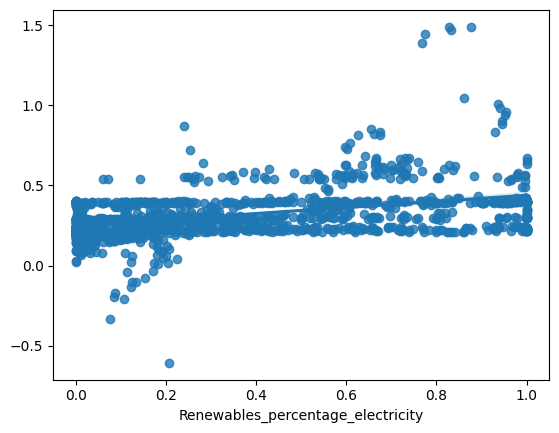

In [ ]:
sns.regplot(x=Y_test, y=Y_pred)

In [ ]:
model_normal_coff = pd.DataFrame(model_normal.coef_,X_train.columns ,columns=['Coffiecent'])
model_normal_coff

,Coffiecent
AREA_KM2,-0.121064
Population,0.107515
GDP,0.596917
Electricity_from_wind_GWH,-2.768613
Electricity_from_wind_GWh,-0.218587
Electricity_from_hydro_GWh,2.889116
Electricity_from_solar_GWh,-1.237201
Other_renewables_including_bioenergy_GWh,1.079725
Africa,0.079220
Asia,-0.105146


### After training the model and making a data normalization, we notice that the weights of Africa and Europe have a light effect, and this is due to the fact that Europe and Africa produce little, so I will delete the classification of Africa and Europe and rebuild the model again

In [ ]:
X_normal.columns

Index(['AREA_KM2', 'Population', 'GDP', 'Electricity_from_wind_GWH',
       'Electricity_from_wind_GWh', 'Electricity_from_hydro_GWh',
       'Electricity_from_solar_GWh',
       'Other_renewables_including_bioenergy_GWh', 'Africa', 'Asia', 'Europe',
       'North America', 'Oceania', 'South America'],
      dtype='object')

In [ ]:
X_normal.columns

Index(['AREA_KM2', 'Population', 'GDP', 'Electricity_from_wind_GWH',
       'Electricity_from_wind_GWh', 'Electricity_from_hydro_GWh',
       'Electricity_from_solar_GWh',
       'Other_renewables_including_bioenergy_GWh', 'Africa', 'Asia', 'Europe',
       'North America', 'Oceania', 'South America'],
      dtype='object')

In [ ]:
X_normal = X_normal.drop(['Africa' ,'Europe' ] ,axis =1)

In [ ]:
X_normal

,AREA_KM2,Population,GDP,Electricity_from_wind_GWH,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh,Asia,North America,Oceania,South America
0,0.037864,0.013830,0.014860,0.000132,0.0,0.000235,0.000000,0.000000,1,0,0,0
1,0.037864,0.013933,0.014860,0.000104,0.0,0.000378,0.000000,0.000000,1,0,0,0
2,0.037864,0.014862,0.000163,0.000098,0.0,0.000424,0.000000,0.000000,1,0,0,0
3,0.037864,0.016026,0.000193,0.000116,0.0,0.000477,0.000000,0.000000,1,0,0,0
4,0.037864,0.016670,0.000222,0.000107,0.0,0.000424,0.000000,0.000000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5248,0.022840,0.010015,0.000854,0.001245,0.0,0.003738,0.000031,0.002472,0,0,0,0
5249,0.022840,0.010226,0.000879,0.001063,0.0,0.002232,0.000031,0.002118,0,0,0,0
5250,0.022840,0.010437,0.000752,0.001046,0.0,0.003004,0.000031,0.001883,0,0,0,0
5251,0.022840,0.010650,0.001463,0.001082,0.0,0.003821,0.000061,0.002295,0,0,0,0


In [ ]:
# Splitting the dependent and independent features of the dataset into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split( X_normal, Y_normal, test_size = 0.3, random_state = np.random.seed(42) )

In [ ]:
# Creating an instance for the linear regression model of sklearn
model_normal_final =LinearRegression( )

In [ ]:
# Training the model by passing the dependent and independent features of the training dataset
model_normal_final.fit( X_train, Y_train)

LinearRegression()

In [ ]:
# Creating an array of predictions made by the model for the unseen or test dataset
Y_pred = model_normal_final.predict( X_test )

In [ ]:
# The value of the coefficients for the independent feature through the multiple regression model
print("Value of the oefficients: \n", model_normal_final.coef_)

Value of the oefficients: 
 [-0.08907668  0.13408391  0.56590559 -2.78403681 -0.18190947  2.7986603
 -1.16071301  1.0207434  -0.12781255 -0.11383659 -0.1019036   0.20315476]


In [ ]:
# The value of the mean squared error
me = mean_squared_error( Y_test, Y_pred)
print("The Mean sequred Error of our Model is {}".format(round(me, 2)))

The Mean sequred Error of our Model is 0.09


In [ ]:
score =mean_absolute_error(Y_test, Y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.24


In [ ]:
# The value of the coefficient of determination, i.e., R-square score of the model
score = r2_score( Y_test, Y_pred )
print("Coefficient of determination {} : ".format(round(score,2)))

Coefficient of determination 0.16 : 


<Axes: xlabel='Renewables_percentage_electricity'>

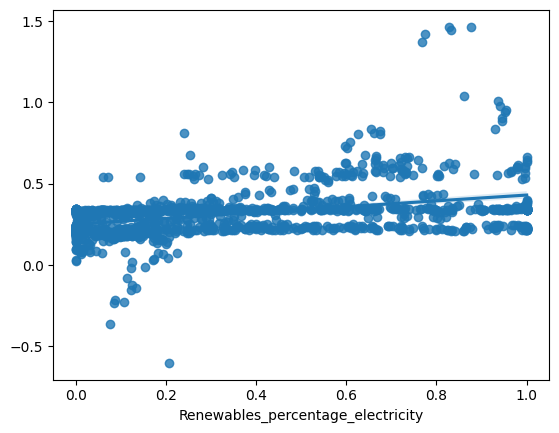

In [ ]:
sns.regplot(x=Y_test, y=Y_pred)

In [ ]:
model_normal_coff = pd.DataFrame(model_normal_final.coef_,X_train.columns ,columns=['Coffiecent'])
model_normal_coff

,Coffiecent
AREA_KM2,-0.089077
Population,0.134084
GDP,0.565906
Electricity_from_wind_GWH,-2.784037
Electricity_from_wind_GWh,-0.181909
Electricity_from_hydro_GWh,2.798660
Electricity_from_solar_GWh,-1.160713
Other_renewables_including_bioenergy_GWh,1.020743
Asia,-0.127813
North America,-0.113837


## After deleted the Europe and Africa ,We notice  R-square score of the model less than other model contain feature Europe and Africa

**So After we make a lot of different models in another algorathims , we find the best θ1 and θ2 values in LinearRegression model "model_normal_final" , we get the best-fit line. So when we are finally using our model for prediction, it will predict the value of y for the input value of x.**

# Linear Regression With Time Series



In [ ]:
df.columns

Index(['Unnamed: 0', 'Entity', 'Code', 'Year', 'Electricity from wind (TWh)',
       'Electricity_from_hydro_TWh', 'Electricity_from_solar_TWh',
       'Other renewables_including_bioenergy_TWh',
       'Renewables_percentage_electricity', 'AREA_KM2', 'Population', 'GDP',
       'Primary_energy_consumption_TWh', 'Electricity_from_wind_GWh',
       'Electricity_from_hydro_GWh', 'Electricity_from_solar_GWh',
       'Other_renewables_including_bioenergy_GWh', 'Continent',
       'Electricity_from_wind_GWH'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0                                  0
Entity                                      0
Code                                        0
Year                                        0
Electricity from wind (TWh)                 0
Electricity_from_hydro_TWh                  1
Electricity_from_solar_TWh                  0
Other renewables_including_bioenergy_TWh    0
Renewables_percentage_electricity           0
AREA_KM2                                    0
Population                                  0
GDP                                         0
Primary_energy_consumption_TWh              0
Electricity_from_wind_GWh                   0
Electricity_from_hydro_GWh                  0
Electricity_from_solar_GWh                  0
Other_renewables_including_bioenergy_GWh    0
Continent                                   0
Electricity_from_wind_GWH                   0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Entity,Code,Year,Electricity from wind (TWh),Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Other renewables_including_bioenergy_TWh,Renewables_percentage_electricity,AREA_KM2,Population,GDP,Primary_energy_consumption_TWh,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh,Continent,Electricity_from_wind_GWH
0,0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0,65.957440,647500.0,19542982,3.464999e+11,5.913606,0.0,310.0,0.0,0.0,Asia,5913.6060
1,1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0,84.745766,647500.0,19688632,3.464999e+11,4.664077,0.0,500.0,0.0,0.0,Asia,4664.0770
2,2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0,81.159424,647500.0,21000256,3.854235e+09,4.428160,0.0,560.0,0.0,0.0,Asia,4428.1597
3,3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0,67.021280,647500.0,22645130,4.539497e+09,5.207662,0.0,630.0,0.0,0.0,Asia,5207.6616
4,4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0,62.921350,647500.0,23553551,5.220825e+09,4.810372,0.0,560.0,0.0,0.0,Asia,4810.3720


In [ ]:
X_time_ser = df[
    [   'Year',
       'Renewables_percentage_electricity', 'AREA_KM2', 'Population', 'GDP',
       'Primary_energy_consumption_TWh', 'Electricity_from_wind_GWh',
       'Electricity_from_hydro_GWh', 'Electricity_from_solar_GWh',
       'Other_renewables_including_bioenergy_GWh', 'Continent',
       'Electricity_from_wind_GWH']
]

Time-step features
There are two kinds of features unique to time series: time-step features and lag features.

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the time dummy, which counts off time steps in the series from beginning to end.

In [ ]:
# Convert from list to dataframe
X_time_ser = pd.DataFrame(X_time_ser)
X_time_ser.set_index('Year', inplace=True)

In [ ]:
X_time_ser.head()

,Renewables_percentage_electricity,AREA_KM2,Population,GDP,Primary_energy_consumption_TWh,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh,Continent,Electricity_from_wind_GWH
Year,,,,,,,,,,,
2000,65.957440,647500.0,19542982,3.464999e+11,5.913606,0.0,310.0,0.0,0.0,Asia,5913.6060
2001,84.745766,647500.0,19688632,3.464999e+11,4.664077,0.0,500.0,0.0,0.0,Asia,4664.0770
2002,81.159424,647500.0,21000256,3.854235e+09,4.428160,0.0,560.0,0.0,0.0,Asia,4428.1597
2003,67.021280,647500.0,22645130,4.539497e+09,5.207662,0.0,630.0,0.0,0.0,Asia,5207.6616
2004,62.921350,647500.0,23553551,5.220825e+09,4.810372,0.0,560.0,0.0,0.0,Asia,4810.3720


In [ ]:
X_time_ser['Time'] = np.arange(len(X_time_ser.index))

X_time_ser.head()

,Renewables_percentage_electricity,AREA_KM2,Population,GDP,Primary_energy_consumption_TWh,Electricity_from_wind_GWh,Electricity_from_hydro_GWh,Electricity_from_solar_GWh,Other_renewables_including_bioenergy_GWh,Continent,Electricity_from_wind_GWH,Time
Year,,,,,,,,,,,,
2000,65.957440,647500.0,19542982,3.464999e+11,5.913606,0.0,310.0,0.0,0.0,Asia,5913.6060,0
2001,84.745766,647500.0,19688632,3.464999e+11,4.664077,0.0,500.0,0.0,0.0,Asia,4664.0770,1
2002,81.159424,647500.0,21000256,3.854235e+09,4.428160,0.0,560.0,0.0,0.0,Asia,4428.1597,2
2003,67.021280,647500.0,22645130,4.539497e+09,5.207662,0.0,630.0,0.0,0.0,Asia,5207.6616,3
2004,62.921350,647500.0,23553551,5.220825e+09,4.810372,0.0,560.0,0.0,0.0,Asia,4810.3720,4


In [ ]:
# Training data
X = X_time_ser.loc[:, ['Time']]  # features
y = X_time_ser.loc[:, 'Renewables_percentage_electricity']  # target

# Train the model
model_time_ser = LinearRegression()
model_time_ser.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model_time_ser.predict(X), index=X.index)



In [ ]:
X.tail(30)

,Time
Year,
2010,5223
2011,5224
2012,5225
2013,5226
2014,5227
2015,5228
2016,5229
2017,5230
2018,5231


In [ ]:
# The value of the coefficients for the independent feature through the multiple regression model
print("Value of the oefficients: \n",model_time_ser.coef_)

Value of the oefficients: 
 [-0.00125135]


In [ ]:
# The value of the intercept for the linear regression model
print("Value of the intercept: \n",model_time_ser.intercept_)

Value of the intercept: 
 33.60228425297897


The model actually created is (approximately): Renewables_percentage_electricity = -0.00125135 * Time + 33.60228425297897. Plotting the fitted values over time shows us how fitting linear regression to the time dummy creates the trend line defined by this equation.

**Linear regression with the time dummy produces the model:**

target = weight * time + bias


The time dummy then lets us fit curves to time series in a time plot, where Time forms the x-axis.

<ipython-input-99-05a86b1ba44e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


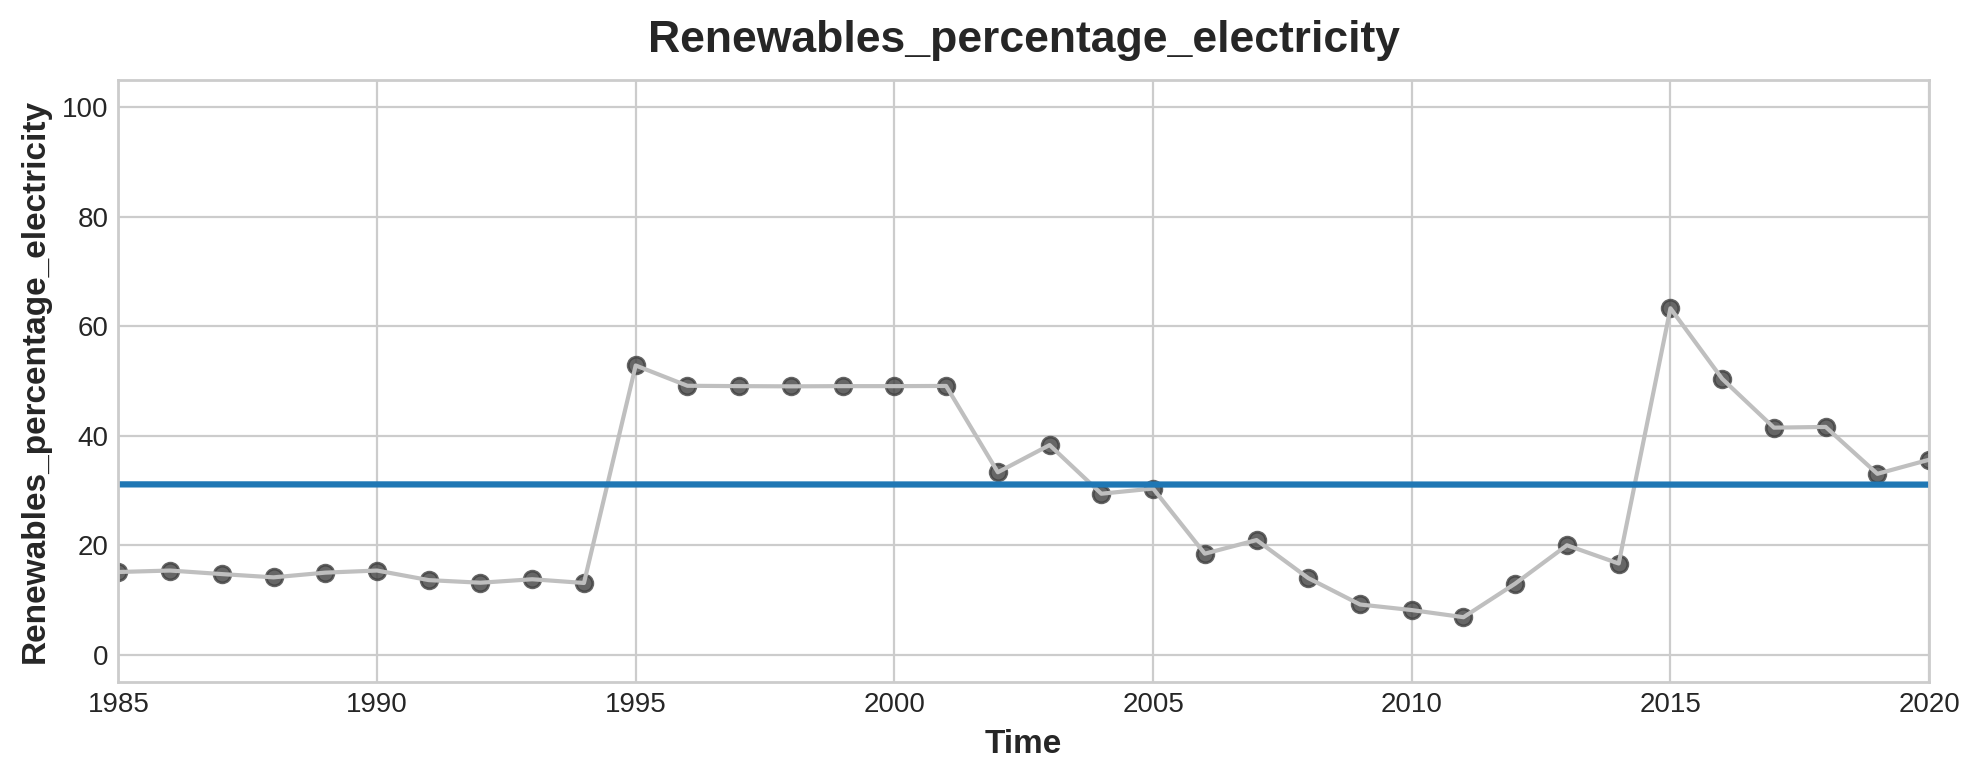

In [ ]:

plt.style.use("seaborn-whitegrid")

plt.rc(
    "figure",
    autolayout=True,
    figsize=(10, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
plt.xlim(1985, 2020)
ax.plot('Time', 'Renewables_percentage_electricity', data=X_time_ser, color='0.75')
ax = sns.regplot(x='Time', y='Renewables_percentage_electricity', data=X_time_ser, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Renewables_percentage_electricity');

In [ ]:
ax = y.plot(**plt.rc)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Renewables_percentage_electricity');

TypeError: ignored

# Training data

In [ ]:
X_time_ser

,Renewables_percentage_electricity,Lag_1
Year,,
2000,65.957440,NaN
2001,84.745766,65.957440
2002,81.159424,84.745766
2003,67.021280,81.159424
2004,62.921350,67.021280
...,...,...
2015,57.188496,59.629250
2016,48.680350,57.188496
2017,58.503407,48.680350


# Lag features
To make a lag feature we shift the observations of the target series so that they appear to have occured later in time. Here we've created a 1-step lag feature, though shifting by multiple steps is possible too.

In [ ]:
X_time_ser['Lag_1'] = X_time_ser['Renewables_percentage_electricity'].shift(1)
X_time_ser = X_time_ser.reindex(columns=['Renewables_percentage_electricity', 'Lag_1'])

X_time_ser.head()

,Renewables_percentage_electricity,Lag_1
Year,,
2000,65.957440,NaN
2001,84.745766,65.957440
2002,81.159424,84.745766
2003,67.021280,81.159424
2004,62.921350,67.021280


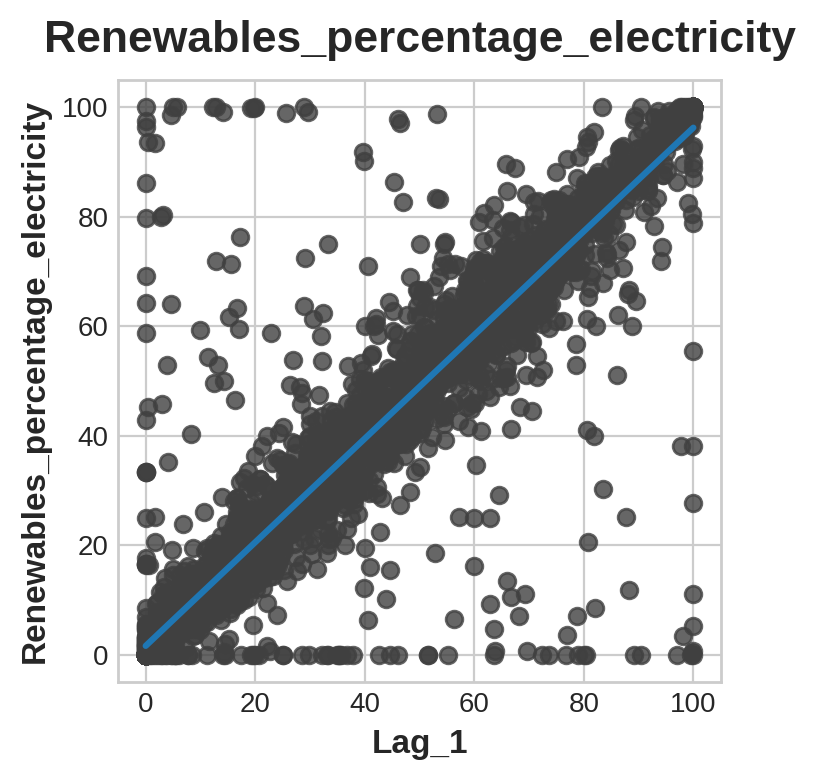

In [ ]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Renewables_percentage_electricity', data=X_time_ser, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Renewables_percentage_electricity');